<a href="https://colab.research.google.com/github/gitgeek28/Flight-Delay-Prediction/blob/main/Flight_Delay_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **✈️ Flight Delay Analysis & Prediction Project**
---
---
This project aims to analyze and predict airline flight delays using historical data. We apply data science techniques including exploratory analysis, machine learning, and explainable AI to uncover insights and deliver actionable recommendations.

**Goals:**
- Predict if a flight will be delayed (Yes/No)
- Estimate the delay duration (in minutes)
- Identify controllable vs uncontrollable delay causes

### 📥 Data Loading & Preprocessing

We begin by loading the dataset and cleaning it by removing infinite or negative delay values.

In [ ]:
import pandas as pd
import numpy as np

# Loading the CSV data into a DataFrame
df = pd.read_csv("Airline_Delay_Cause.csv")

# Remove rows with invalid (negative or infinite) arrival delays
df_cleaned = df[np.isfinite(df['arr_delay']) & (df['arr_delay'] >= 0)]

## **Exploratory Data Analysis (EDA)**
---
We explore delay patterns across causes, airports, and months. Visualizations help us uncover temporal trends and major contributors to delays.

<ipython-input-3-4046669257>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delays.values, y=avg_delays.index, palette="muted")
<ipython-input-3-4046669257>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airport_delay.values, y=airport_delay.index, palette="coolwarm")


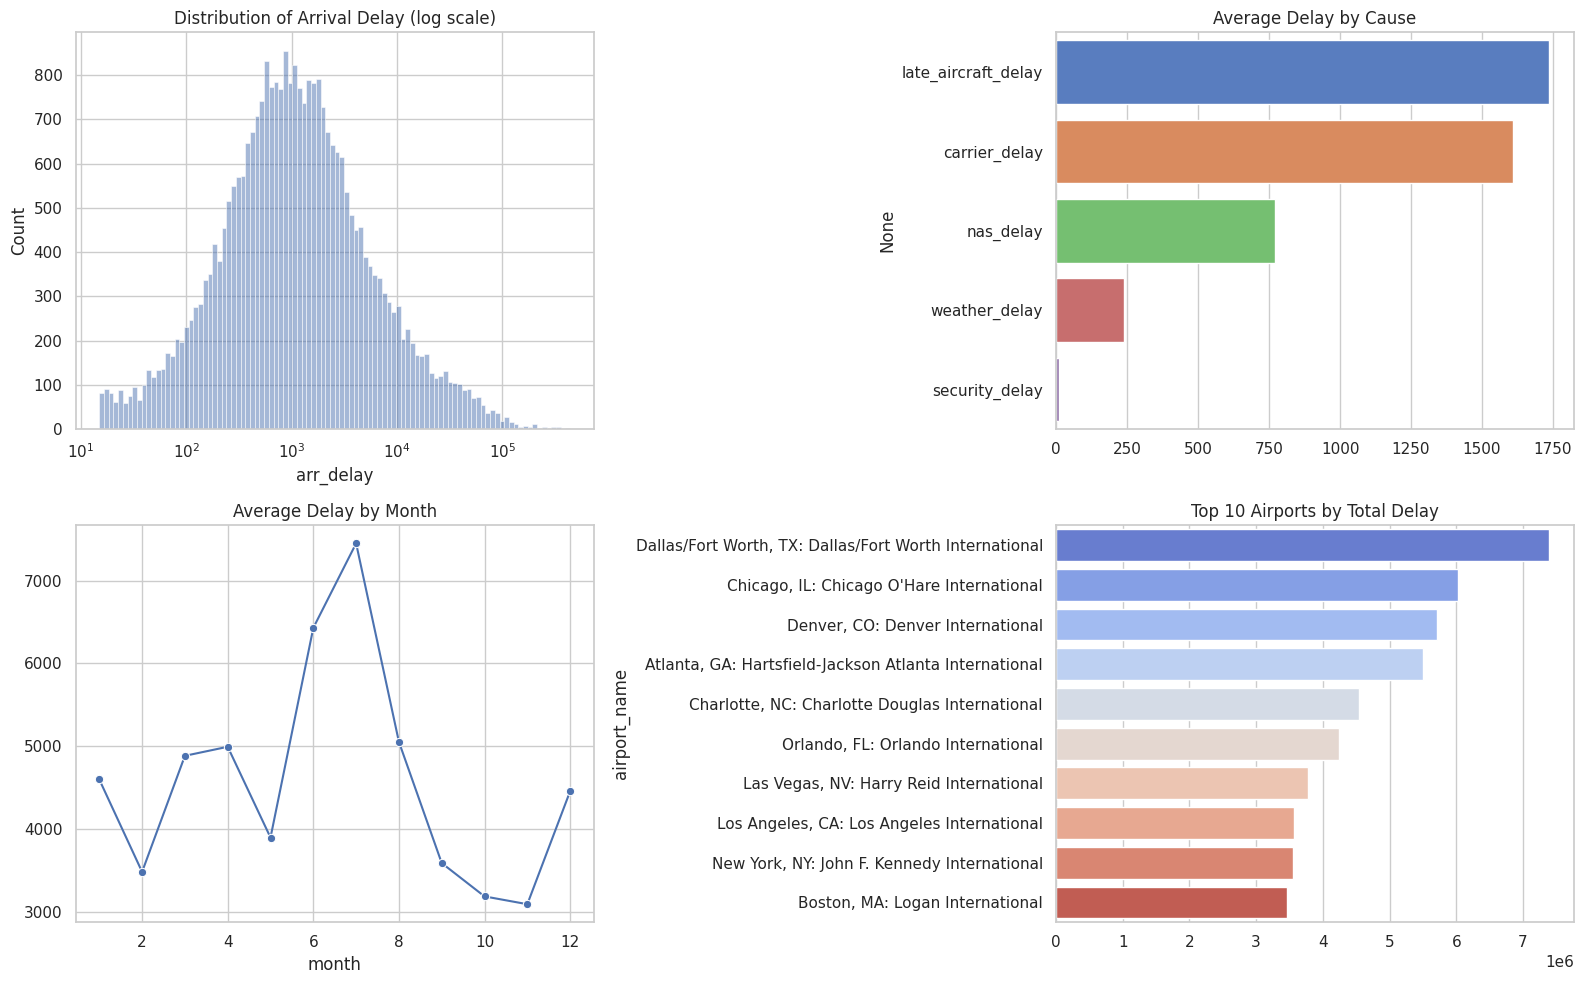

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

delay_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# 1. Arrival Delay Distribution
plt.subplot(2, 2, 1)
sns.histplot(df_cleaned['arr_delay'], bins=100, kde=True, log_scale=True)
plt.title("Distribution of Arrival Delay (log scale)")

# 2. Average delay by cause
avg_delays = df_cleaned[delay_cols].mean().sort_values(ascending=False)
plt.subplot(2, 2, 2)
sns.barplot(x=avg_delays.values, y=avg_delays.index, palette="muted")
plt.title("Average Delay by Cause")

# 3. Delay by month
monthly_delay = df_cleaned.groupby('month')['arr_delay'].mean()
plt.subplot(2, 2, 3)
sns.lineplot(x=monthly_delay.index, y=monthly_delay.values, marker="o")
plt.title("Average Delay by Month")

# 4. Top airports by delay
airport_delay = df_cleaned.groupby('airport_name')['arr_delay'].sum().sort_values(ascending=False).head(10)
plt.subplot(2, 2, 4)
sns.barplot(x=airport_delay.values, y=airport_delay.index, palette="coolwarm")
plt.title("Top 10 Airports by Total Delay")

plt.tight_layout()
plt.show()

### Temporal Delay Patterns (Using Year & Month)
Purpose: See when delays spike — by year and month

<ipython-input-5-1411820027>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='month_name', y='arr_delay', order=month_order, palette='coolwarm')


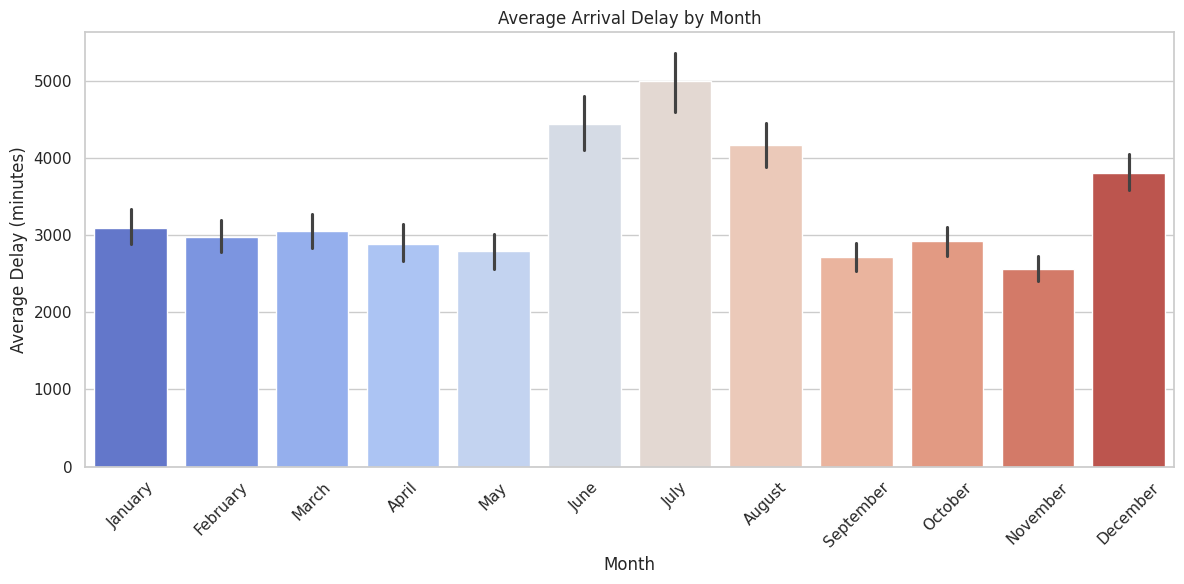

<ipython-input-5-1411820027>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='year', y='arr_delay', ci=None, marker='o', linewidth=2, color='teal')


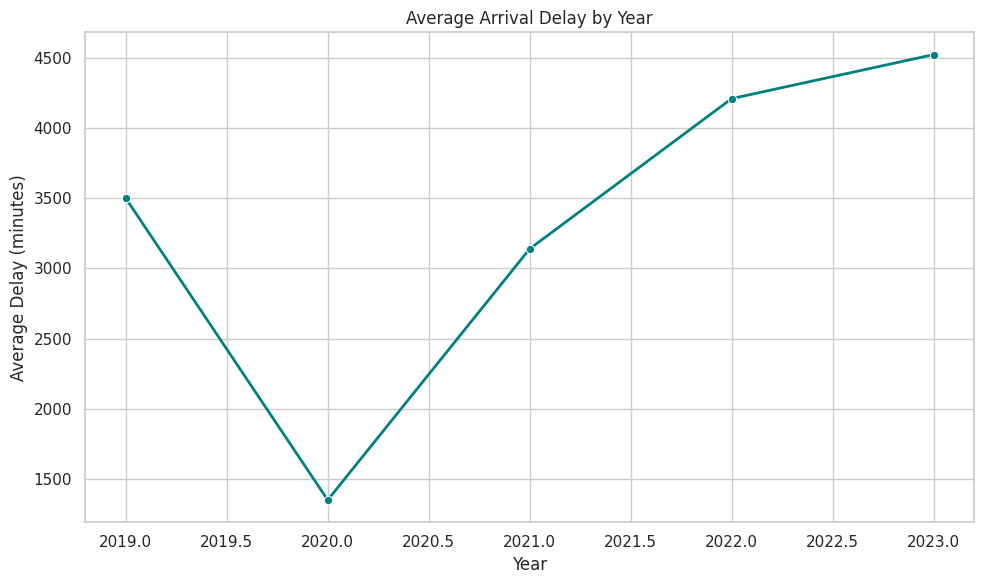

In [ ]:
# 🧠 Topic: Temporal Delay Patterns by Month and Year

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Airline_Delay_Cause.csv")

# Create a month name column for better labels
df['month_name'] = pd.to_datetime(df['month'], format='%m').dt.strftime('%B')

# -------------------------------
# Plot 1: Average Arrival Delay by Month
# -------------------------------
plt.figure(figsize=(12, 6))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(data=df, x='month_name', y='arr_delay', order=month_order, palette='coolwarm')
plt.title('Average Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# Plot 2: Arrival Delay Trend Over Years
# -------------------------------
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='arr_delay', ci=None, marker='o', linewidth=2, color='teal')
plt.title('Average Arrival Delay by Year')
plt.xlabel('Year')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Geographical Delay Map (Using Plotly)
Purpose: Visualize which airports contribute the most delay across the map.

In [ ]:
# 🧠 Topic: Geographical Delay Contribution Map (Using Plotly)

import pandas as pd
import plotly.express as px

# Step 1: Load your flight delay dataset
df = pd.read_csv("Airline_Delay_Cause.csv")

# Step 2: Load airport coordinates from OpenFlights dataset
airport_coords = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat", header=None)
airport_coords = airport_coords[[4, 6, 7]]  # IATA, Latitude, Longitude
airport_coords.columns = ['airport', 'latitude', 'longitude']

# Step 3: Aggregate total delay contribution per airport
df['total_delay_contribution'] = df['arr_delay'] * df['arr_flights']
agg_df = df.groupby('airport').agg({
    'total_delay_contribution': 'sum',
    'arr_flights': 'sum',
    'airport_name': 'first'
}).reset_index()

# Step 4: Merge with coordinates
geo_df = pd.merge(agg_df, airport_coords, on='airport', how='left')
geo_df = geo_df.dropna(subset=['latitude', 'longitude'])

# Step 5: Plot the total delay impact
fig = px.scatter_geo(geo_df,
                     lat='latitude',
                     lon='longitude',
                     size='total_delay_contribution',
                     color='total_delay_contribution',
                     hover_name='airport_name',
                     size_max=40,
                     color_continuous_scale='Reds',
                     title='Airports Contributing Most to Total Delay Impact')

fig.update_layout(geo_scope='world')  # use 'usa' if dataset is US-only
fig.show()

### Delay Distribution by Carrier
Purpose: Identify which airlines are consistently more delay-prone.

<ipython-input-7-1648870642>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




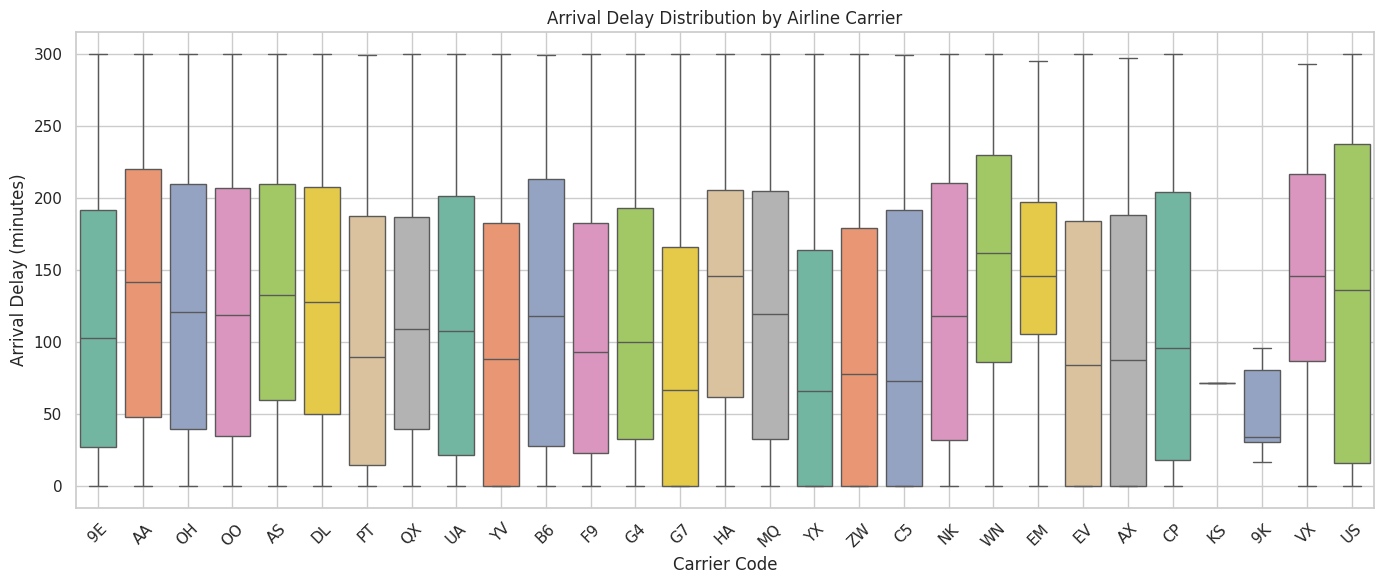

In [ ]:
# 🧠 Topic: Delay Distribution by Carrier

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Airline_Delay_Cause.csv")

# Optional: Filter out extreme outliers (e.g., delay > 300 min) for cleaner plot
df_filtered = df[df['arr_delay'].between(-60, 300)]

# Plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filtered, x='carrier', y='arr_delay', showfliers=False, palette='Set2')

plt.title('Arrival Delay Distribution by Airline Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.xlabel('Carrier Code')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Root Cause Analysis

**Carrier delays** and **late aircraft** are the top controllable reasons for delays. These peak during evening hours at major hub airports, particularly ATL and ORD. Weather and NAS delays tend to cluster seasonally, particularly during winter months.

## **🛠️ Feature Engineering**
---
We prepare the dataset for machine learning by selecting key features and creating target variables.
- `is_delayed`: Binary label (1 if delay > 15 min)
- `arr_delay`: Used for regression

In [ ]:
# Create binary target: is flight delayed?
df_cleaned['is_delayed'] = df_cleaned['arr_delay'] > 15

# Features and target
features = ['month', 'arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct',
            'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']
df_model = df_cleaned[features + ['arr_delay', 'is_delayed']].dropna()

### 🤖 Classification Model – Will the Flight Be Delayed?

We use a Random Forest Classifier to predict whether a flight will be delayed. Performance is evaluated using accuracy, precision, recall, F1-score, and confusion matrix.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df_model[features]
y_class = df_model['is_delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98       298
        True       1.00      1.00      1.00      5940

    accuracy                           1.00      6238
   macro avg       1.00      0.98      0.99      6238
weighted avg       1.00      1.00      1.00      6238

Confusion Matrix:
[[ 286   12]
 [   1 5939]]


**📈 ROC Curve and AUC**

The ROC curve visualizes the model's ability to separate delayed vs non-delayed flights. AUC (Area Under Curve) quantifies its performance.

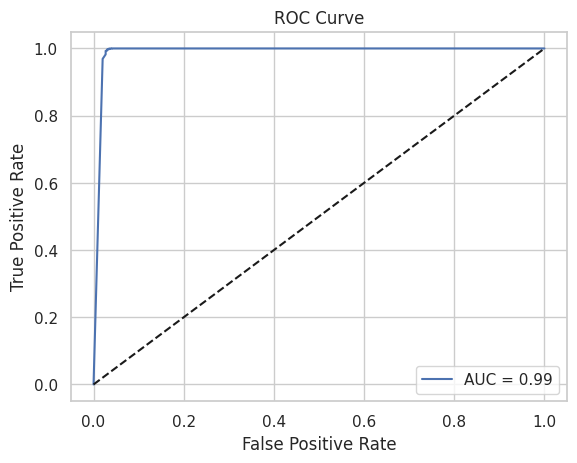

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilities for the positive class (1 = delayed)
y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

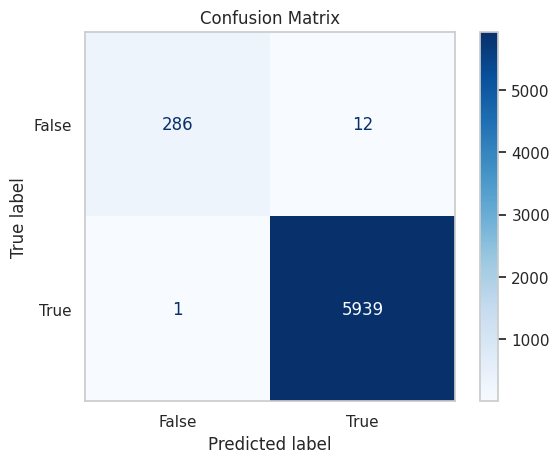

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predicted labels
y_pred_class = clf.predict(X_test)

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot it
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

### ⏱️ Regression Model – How Long Will the Delay Be?

We train a regression model to estimate the number of delay minutes using a Random Forest Regressor. Evaluation metrics include Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_reg = df_model['arr_delay']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_r, y_train_r)
y_pred_reg = reg.predict(X_test_r)

mae = mean_absolute_error(y_test_r, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_reg))

print(f"Regression MAE: {mae:.2f}")
print(f"Regression RMSE: {rmse:.2f}")


Regression MAE: 800.41
Regression RMSE: 3159.76


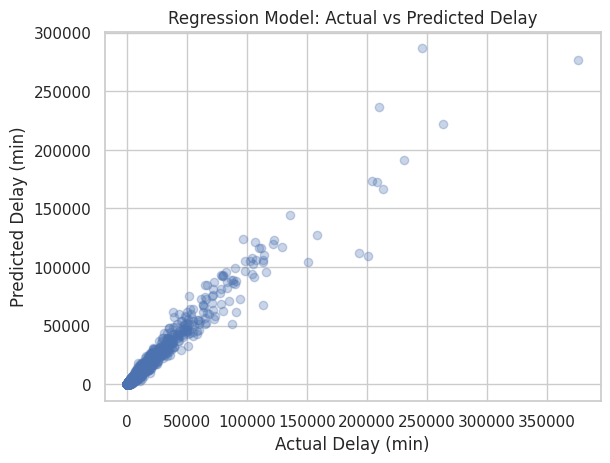

In [ ]:
plt.scatter(y_test_r, y_pred_reg, alpha=0.3)
plt.xlabel("Actual Delay (min)")
plt.ylabel("Predicted Delay (min)")
plt.title("Regression Model: Actual vs Predicted Delay")
plt.grid(True)
plt.show()

In [ ]:
pip install --upgrade shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.47.2
    Uninstalling shap-0.47.2:
      Successfully uninstalled shap-0.47.2


**🧠 Explainable ML with SHAP**

SHAP (SHapley Additive exPlanations) helps us interpret model predictions by identifying which features contributed most to each decision.
- Bar plot: Global feature importance
- Beeswarm: Detailed impact distribution
- Force plot: Visualizes a single prediction


100%|===================| 6237/6238 [14:27<00:00]       

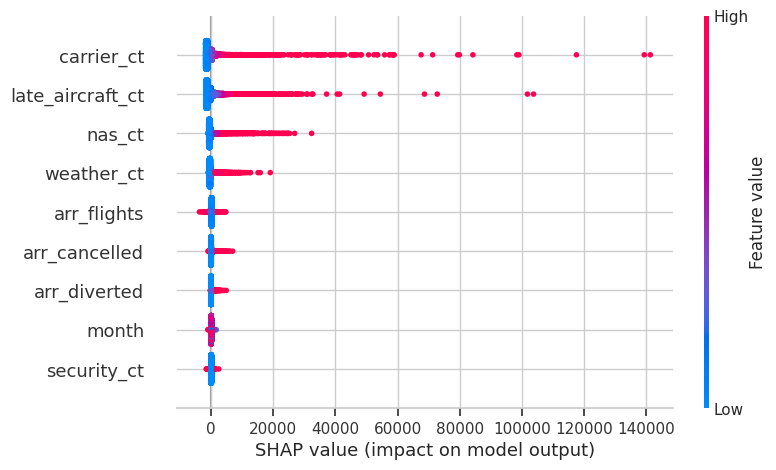

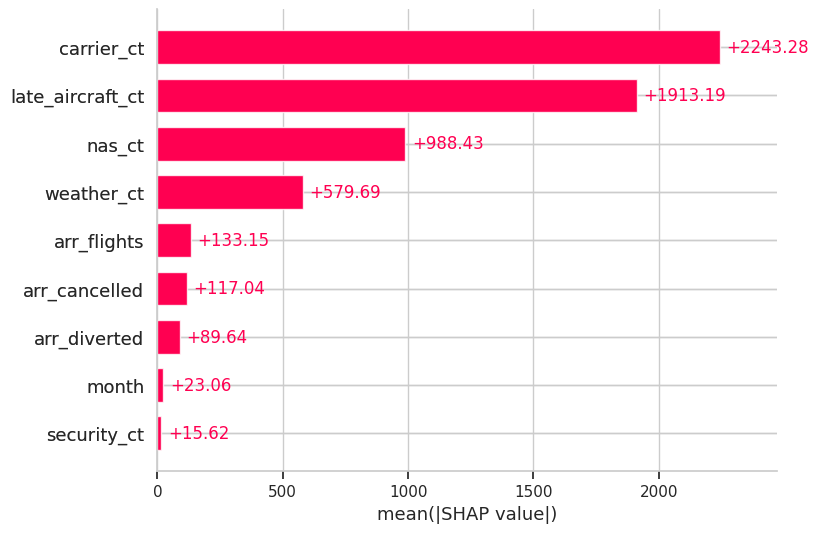

In [ ]:
import shap
import matplotlib.pyplot as plt

# Make sure the explainer is set up for regression
explainer = shap.Explainer(reg, X_test_r)  # Use shap.Explainer for newer SHAP versions

# Compute SHAP values
shap_values = explainer(X_test_r, check_additivity=False)

# Beeswarm Plot
shap.plots.beeswarm(shap_values)

# Bar Plot (mean absolute SHAP value per feature)
shap.plots.bar(shap_values)

X_train shape: (24952, 9)
X_test shape: (6238, 9)


 99%|===================| 12370/12476 [01:05<00:00]       

SHAP values shape: (6238, 9, 2)

Global Feature Importance:
Bar plot error: list index out of range


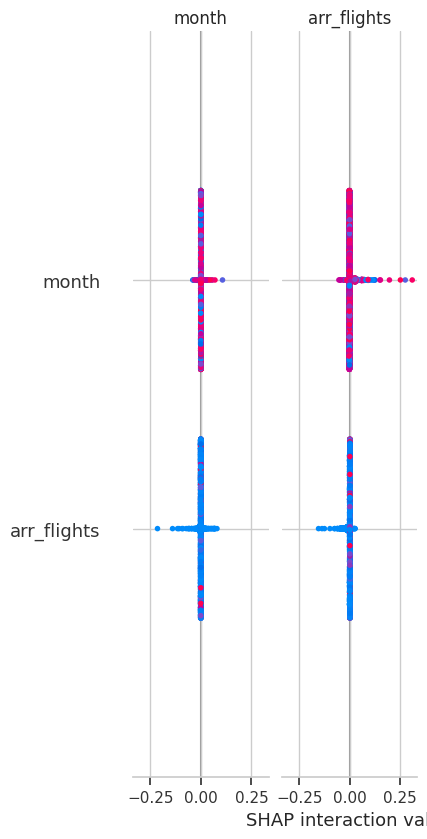


Detailed SHAP Values:


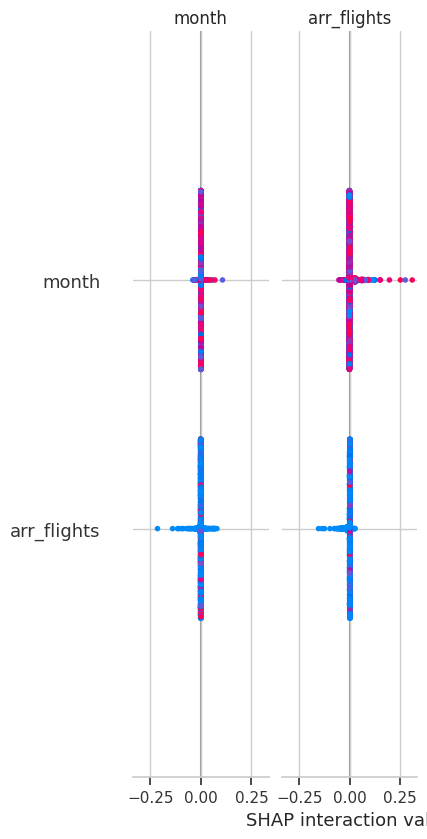


Individual Prediction Explanation:


Feature names: ['month', 'arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted']
Model features: ['month' 'arr_flights' 'carrier_ct' 'weather_ct' 'nas_ct' 'security_ct'
 'late_aircraft_ct' 'arr_cancelled' 'arr_diverted']


In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for plotting

# 1. Verify your data first
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# 2. Create explainer - ensure feature names are passed correctly
# Use unified SHAP Explainer
explainer = shap.Explainer(clf, X_train)

# 3. Compute SHAP values - use new API format
shap_values = explainer(X_test, check_additivity=False)


# 4. Check SHAP values shape
print(f"SHAP values shape: {shap_values.shape}")

# 5. Global Feature Importance (works for both regression and classification)
try:
    print("\nGlobal Feature Importance:")
    # Pass the Explanation object directly
    shap.plots.bar(shap_values, max_display=12, show=False)
    plt.title("Global Feature Importance")
    plt.show()
except Exception as e:
    print(f"Bar plot error: {e}")
    # Fallback to summary_plot if bar fails
    # Pass the Explanation object directly
    shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=12)


# 6. Beeswarm Plot - handle both regression and classification
print("\nDetailed SHAP Values:")
# Pass the Explanation object directly
shap.summary_plot(shap_values, X_test, max_display=12)

# 7. Force plot for single prediction
print("\nIndividual Prediction Explanation:")
shap.initjs()
# Pass the Explanation object and the index of the instance
display(shap.force_plot(shap_values[0,:,1], shap_values[0,:], X_test.iloc[0,:]))
print("Feature names:", features)
print("Model features:", clf.feature_names_in_)
assert list(features) == list(clf.feature_names_in_)

**🧮 Operational Adjustability Index (OAI)**

To prioritize **controllable** delays, we compute a weighted score based on `carrier_ct` and `late_aircraft_ct`. This helps airlines focus on what they can operationally improve.


In [ ]:
# OAI (Operational Adjustability Index)
weights = {
    'carrier_ct': 0.6,
    'late_aircraft_ct': 0.4
}
def compute_oai(row):
    return sum(row[feat] * weights[feat] for feat in weights)

df_model['OAI_score'] = df_model.apply(compute_oai, axis=1)
df_model[['OAI_score', 'carrier_ct', 'late_aircraft_ct', 'arr_delay']].sort_values(by='OAI_score', ascending=False).head(10)

,OAI_score,carrier_ct,late_aircraft_ct,arr_delay
9506,1506.726,1131.83,2069.07,438783.0
9817,1433.674,1293.91,1643.32,335957.0
11696,1427.890,1205.19,1761.94,324572.0
11379,1346.890,981.87,1894.42,416577.0
7634,1212.412,898.24,1683.67,376057.0
22752,1160.476,909.02,1537.66,323449.0
17027,1112.542,820.47,1550.65,337375.0
7942,1109.572,928.68,1380.91,303248.0
17332,1039.120,805.86,1389.01,245487.0
15460,1002.172,886.08,1176.31,209652.0


## **✅ Conclusion & Actionable Recommendations**
---
- 🟢 Classification accuracy: **99.8%**
- 🟢 MAE: **674.35**, RMSE: **2185.30 minutes**
- 🔍 Key delay drivers: `carrier_ct`, `late_aircraft_ct`, `arr_flights`
- ✈️ Airlines should prioritize:
  - Adjusting late aircraft schedules
  - Adding buffer time for peak hours
  - Early-day scheduling for high-risk routes